In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the model building libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# Importing the warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
surprise_housing_df = pd.read_excel(r"C:\Users\user3\Downloads\train.xlsx")
surprise_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
# Checking the basic information
surprise_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

DATA CLEANING

In [4]:
#Finding Missing Values

# Function to return columns with null values
def columns_with_missing_values():
    total = surprise_housing_df.isnull().sum().sort_values(ascending=False)
    percent = round(surprise_housing_df.isnull().sum()*100/len(surprise_housing_df), 2).sort_values(ascending=False)
    
    all_features = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    all_features = all_features[all_features.Total != 0]
    
    if len(all_features) == 0:
        return 'No Column with Missing Values.'
    return all_features
   
# Printing columns with null values
columns_with_missing_values()

,Total,Percent
PoolQC,1161,99.40
MiscFeature,1124,96.23
Alley,1091,93.41
Fence,931,79.71
FireplaceQu,551,47.17
LotFrontage,214,18.32
GarageYrBlt,64,5.48
GarageFinish,64,5.48
GarageType,64,5.48
GarageQual,64,5.48


Removing Meaningful Columns - NA means None

In [5]:
# List of columns with NA has a definition in the sheet
columns_with_meaningfull_null = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", 
          "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtFinType1",
          "BsmtCond", "MasVnrType","LotFrontage"]

for column in columns_with_meaningfull_null:
    before = surprise_housing_df[column].isnull().sum()
    surprise_housing_df[column].fillna("None", inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

1161 missing values of PoolQC imputed.
1124 missing values of MiscFeature imputed.
1091 missing values of Alley imputed.
931 missing values of Fence imputed.
551 missing values of FireplaceQu imputed.
64 missing values of GarageCond imputed.
64 missing values of GarageType imputed.
64 missing values of GarageFinish imputed.
64 missing values of GarageQual imputed.
31 missing values of BsmtFinType2 imputed.
31 missing values of BsmtExposure imputed.
30 missing values of BsmtQual imputed.
30 missing values of BsmtFinType1 imputed.
30 missing values of BsmtCond imputed.
7 missing values of MasVnrType imputed.
214 missing values of LotFrontage imputed.


,Total,Percent
GarageYrBlt,64,5.48
MasVnrArea,7,0.60


In [6]:
# Removing non meaningfull columns

# List of columns where Median values can be imputed
columns_with_not_meaningfull_null = ["GarageYrBlt", "MasVnrArea"]

for column in columns_with_not_meaningfull_null:
    before = surprise_housing_df[column].isnull().sum()
    surprise_housing_df[column].fillna(surprise_housing_df[column].median(), inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

64 missing values of GarageYrBlt imputed.
7 missing values of MasVnrArea imputed.


'No Column with Missing Values.'

In [7]:
# Making all continuous columns (integer and float) in one dataset 
surprise_housing_num_df = surprise_housing_df.select_dtypes(include=['float64', 'int64'])
print("Shape :", surprise_housing_num_df.shape)

surprise_housing_num_df.head()

Shape : (1168, 37)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [8]:
# Dropping the 'Id' column
surprise_housing_num_df.drop(columns=["Id"], inplace=True)

In [9]:
# Target column name
sale_price_column = "SalePrice"

Plotting numerical columns

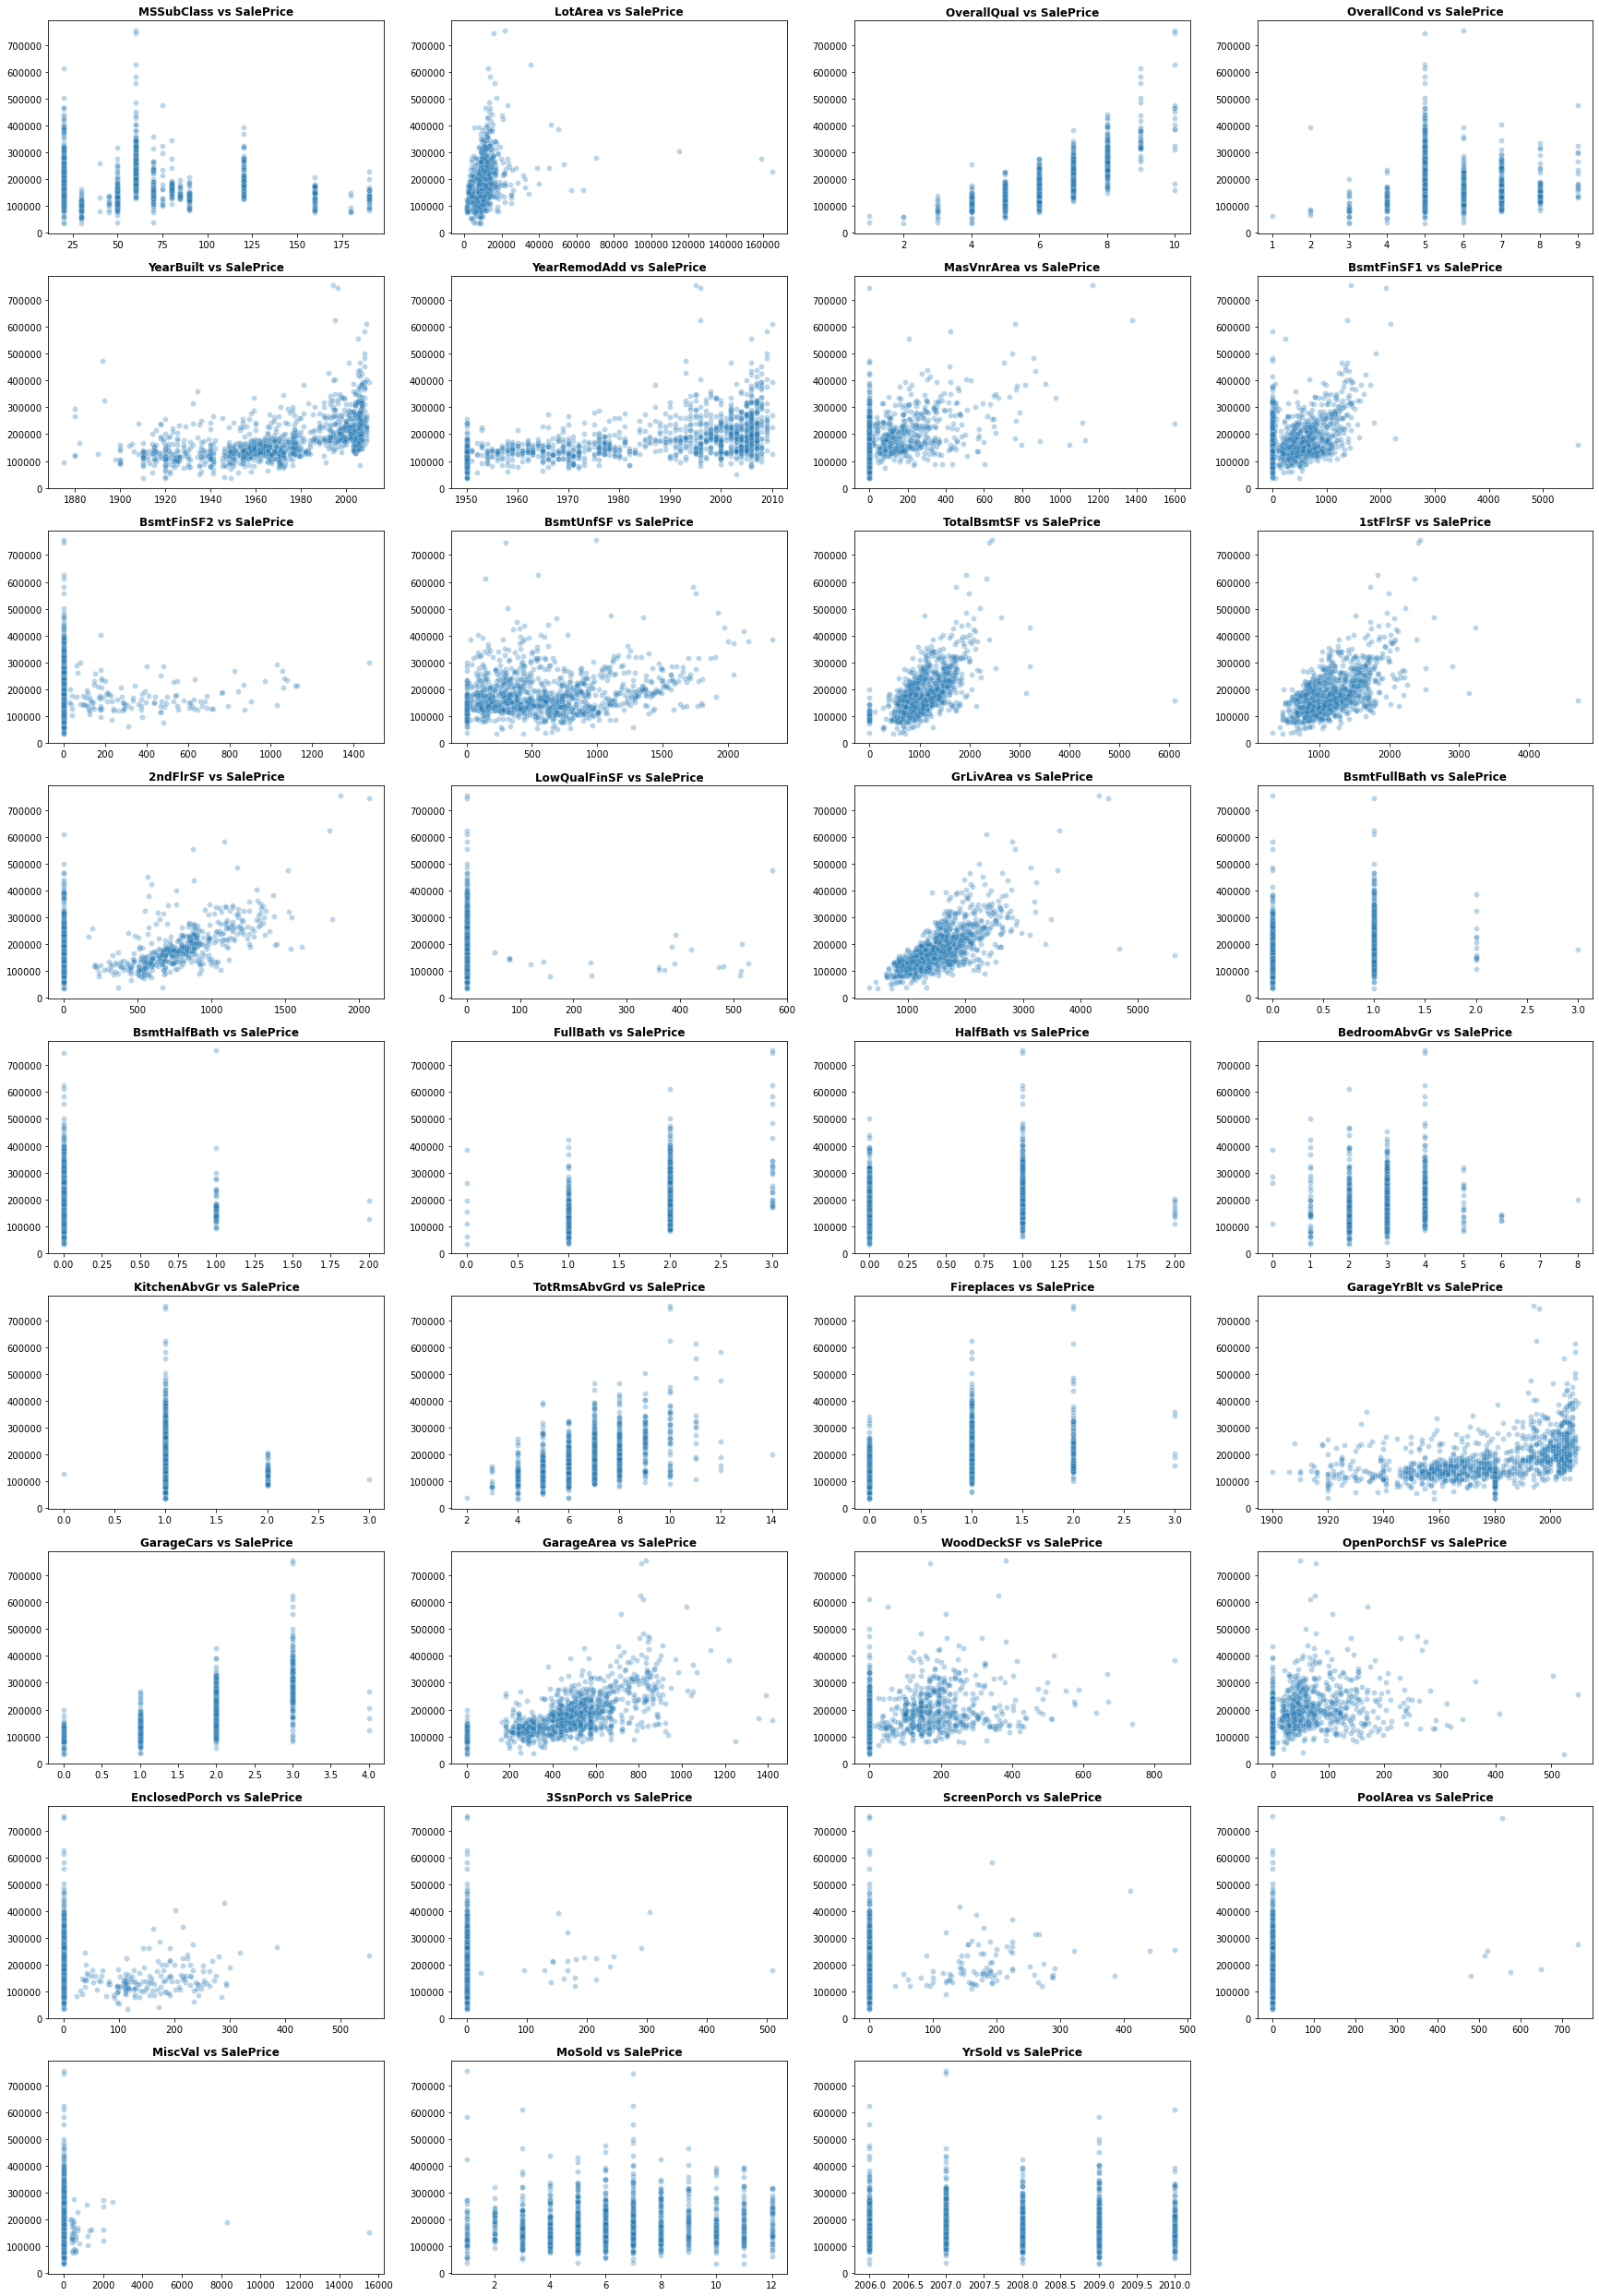

In [10]:
# Numerical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in surprise_housing_num_df.columns:
    if column != sale_price_column:
        plt.subplot(10, 4, count)
        sns.scatterplot(surprise_housing_df[column], surprise_housing_df[sale_price_column], alpha = 0.3).set(ylabel=None, xlabel=None)
        plt.title(column + " vs " + sale_price_column, weight='bold')
        count += 1
    
plt.show()

Plot corelating

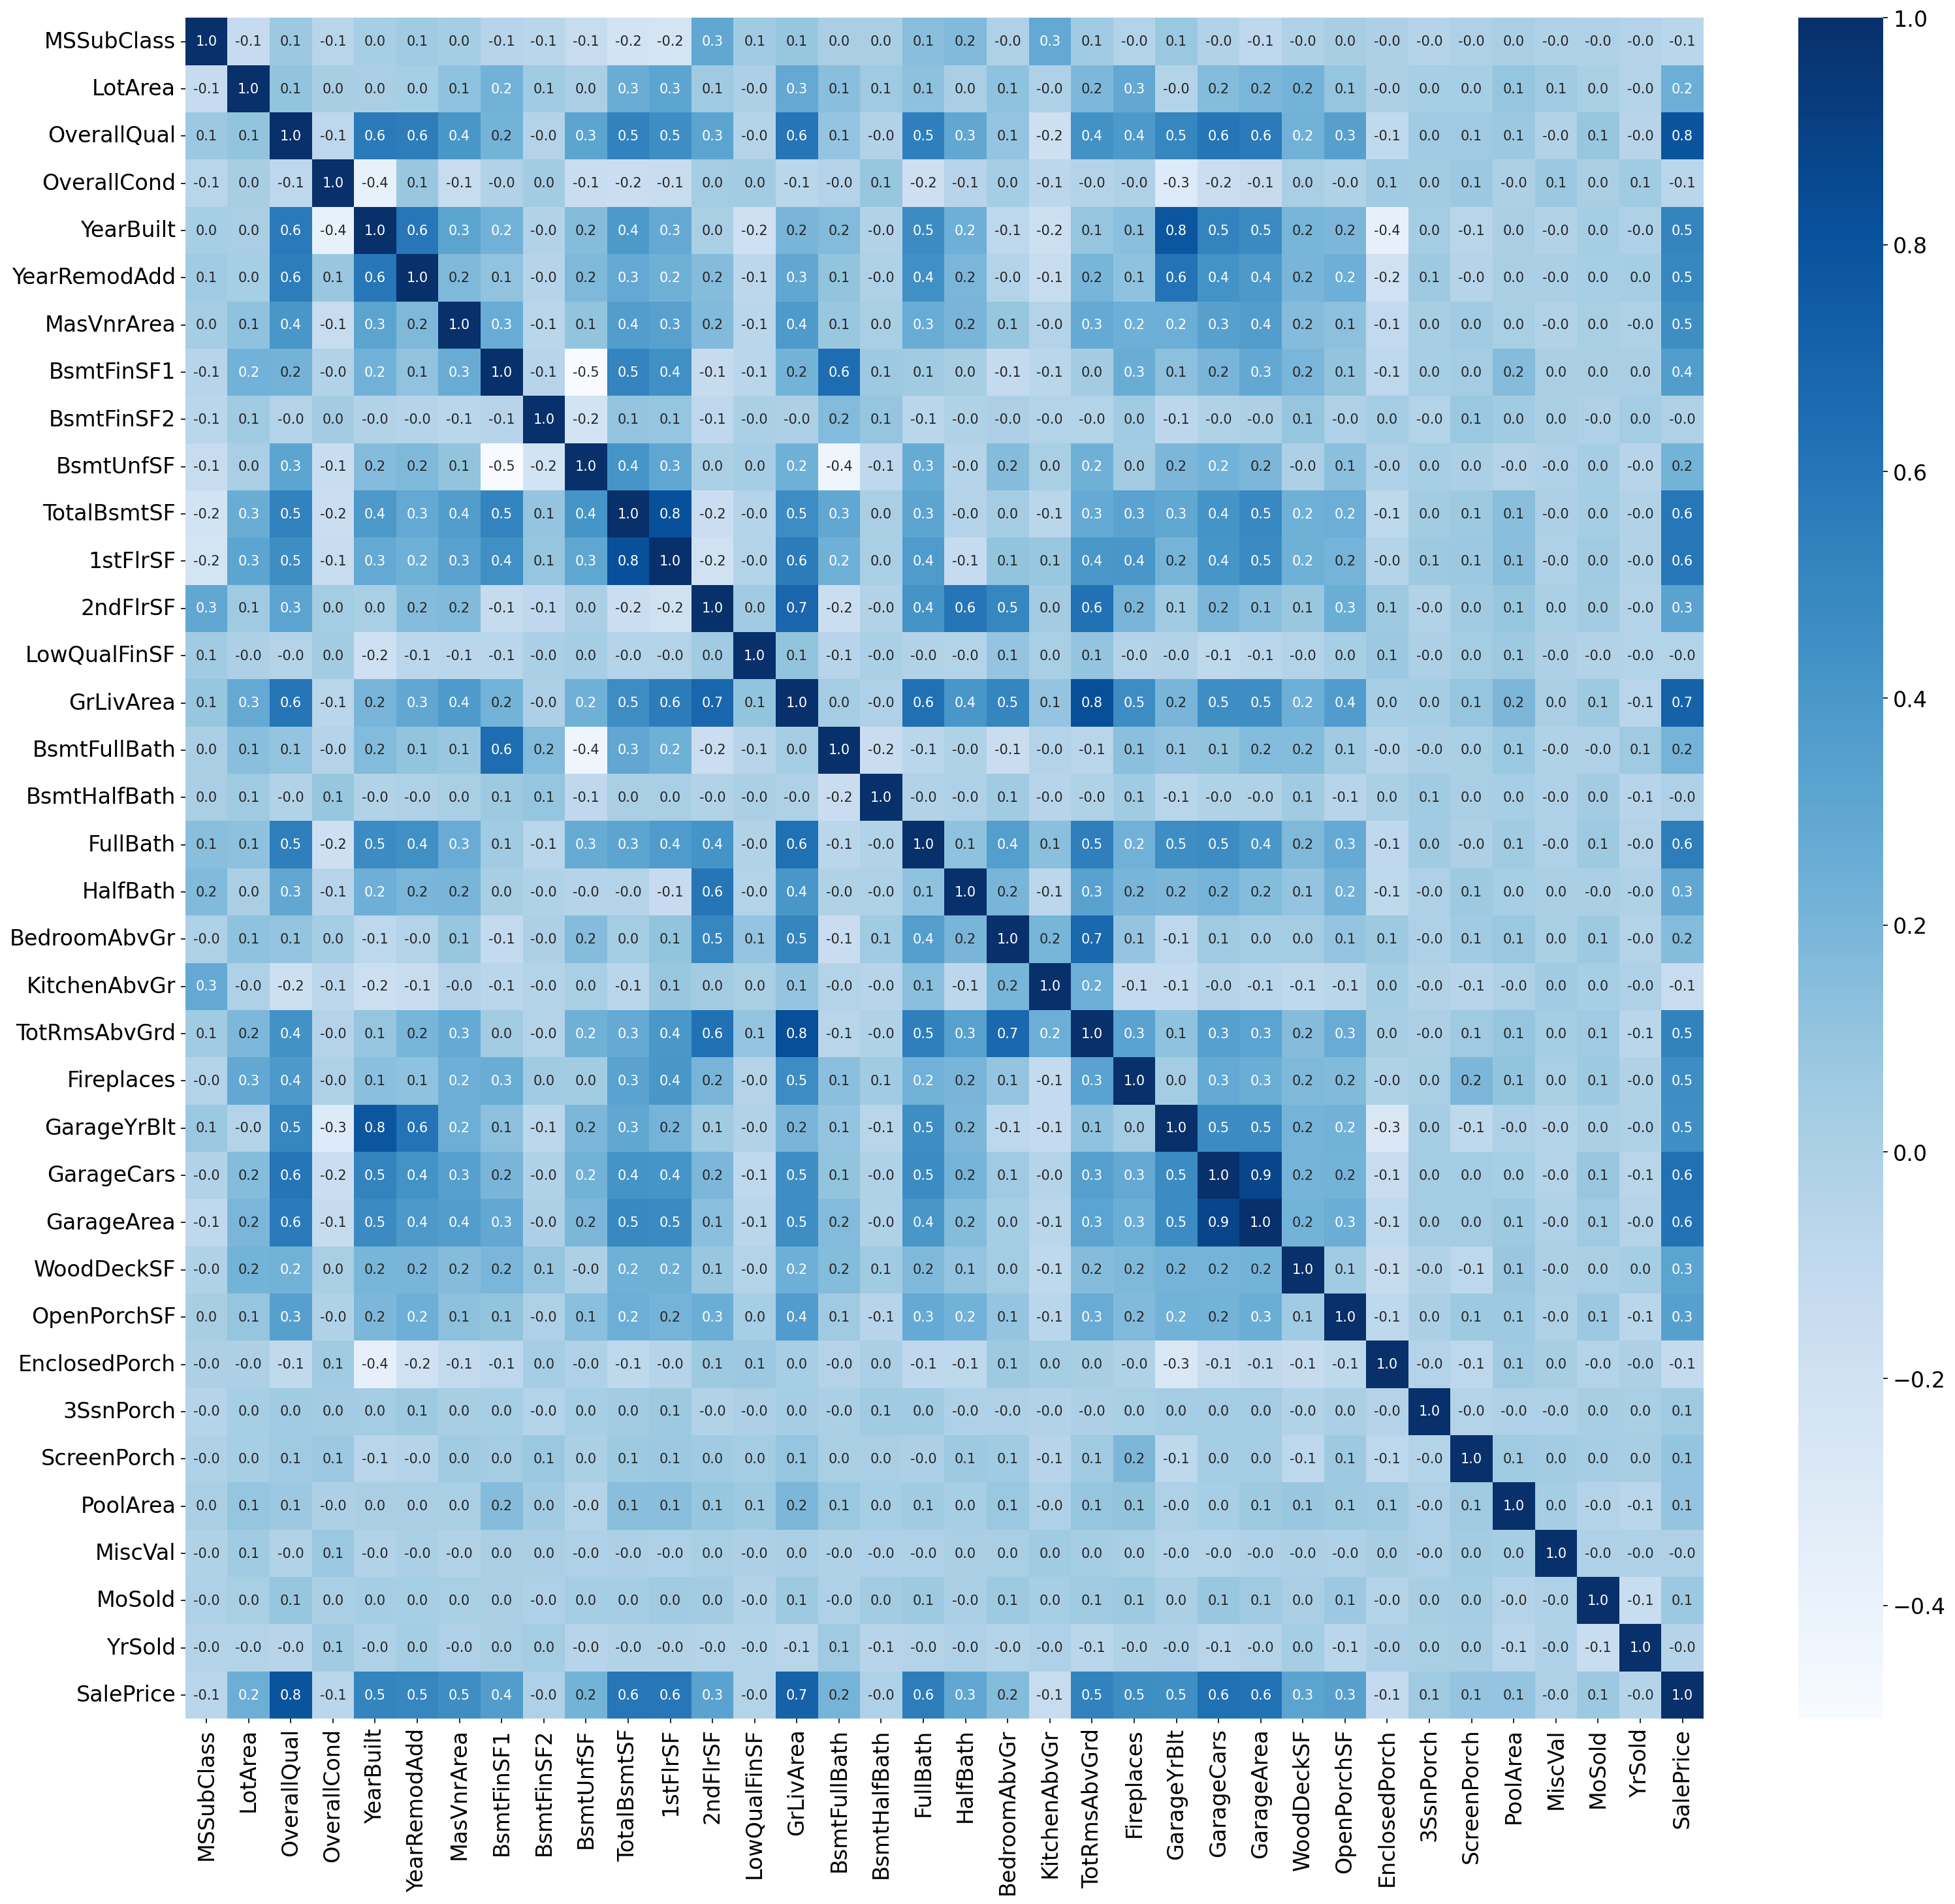

In [11]:
# Correlation graph
fig = plt.figure(figsize=(25,23),dpi=150)

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

sns.heatmap(surprise_housing_num_df.corr(), annot = True, cmap="Blues",fmt='.1f')
plt.show()

In [12]:
# Making all categoric variables (object) in one dataset 
surprise_housing_obj_df = surprise_housing_df.select_dtypes(exclude=['float64', 'int64'])
print("Shape", surprise_housing_obj_df.shape)

surprise_housing_obj_df.head()

Shape (1168, 44)


,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,None,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,95.0,Pave,None,IR1,Lvl,AllPub,Inside,Mod,NAmes,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
2,RL,92.0,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
3,RL,105.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,RFn,TA,TA,Y,None,MnPrv,None,COD,Normal
4,RL,None,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,...,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal


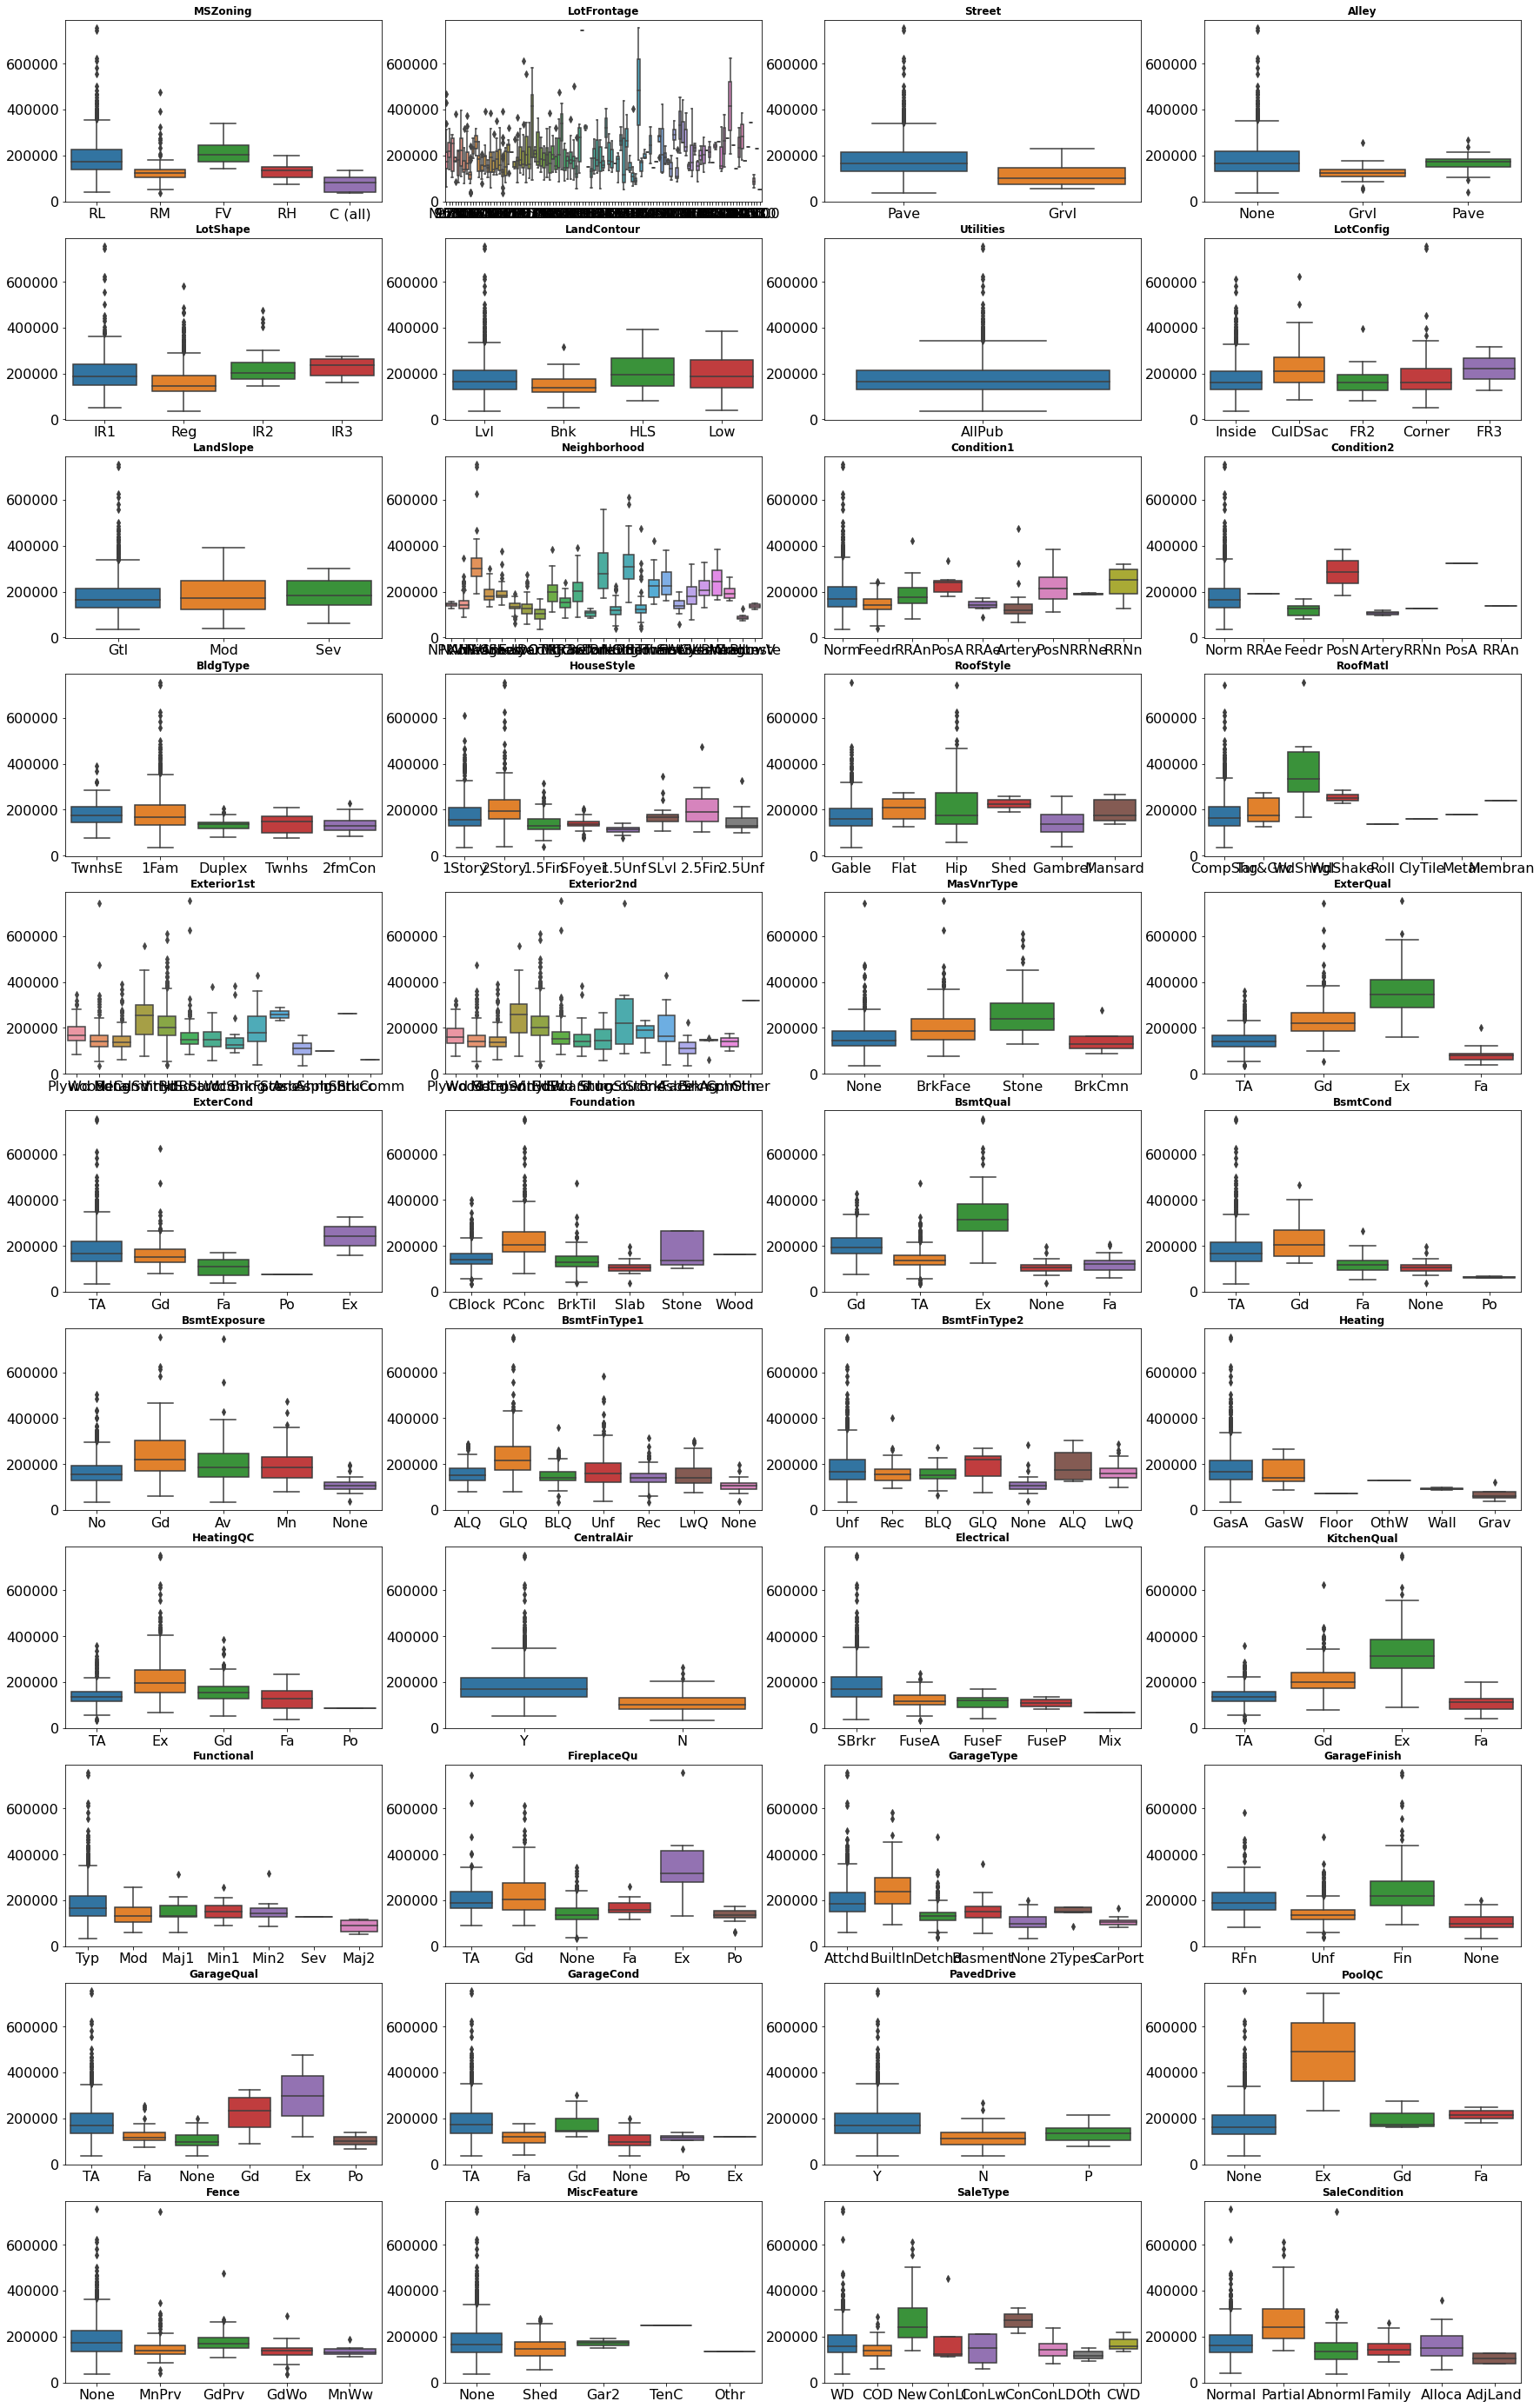

In [13]:
#Plotting Categorical Columns
# Categorical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in surprise_housing_obj_df.columns:
    if column != sale_price_column:
        plt.subplot(11, 4, count)
        sns.boxplot(x=surprise_housing_df[column], y=surprise_housing_df[sale_price_column]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
    
plt.show()

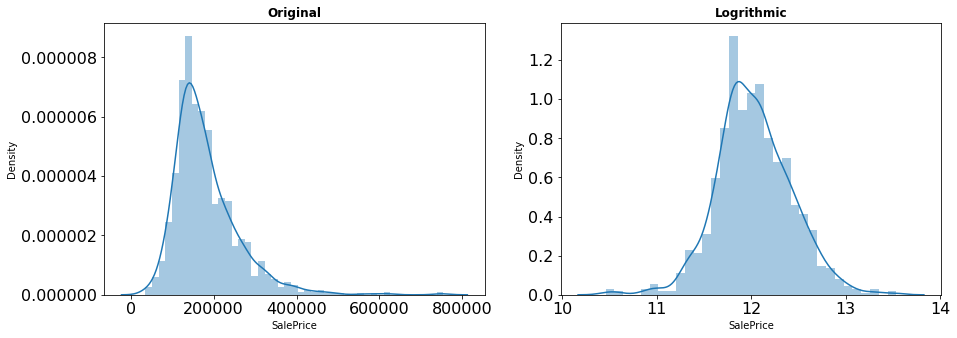

In [14]:
# Target variable data analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(surprise_housing_df[sale_price_column]).ticklabel_format(useOffset=False, style='plain')
plt.title("Original", weight='bold')

plt.subplot(1, 2, 2)
sns.distplot(np.log(surprise_housing_df[sale_price_column]))
plt.title("Logrithmic", weight='bold')

plt.show()

In [15]:
# Target column (transformed) name
converted_sale_price_column = "ConvertedSalePrice"

surprise_housing_num_df[converted_sale_price_column] = np.log(surprise_housing_num_df[sale_price_column])
surprise_housing_num_df[[sale_price_column, converted_sale_price_column]].head()

,SalePrice,ConvertedSalePrice
0,128000,11.759786
1,268000,12.498742
2,269790,12.505399
3,190000,12.154779
4,215000,12.278393


In [16]:
# Creating dummy variables for categorical variables
surprise_housing_dummies = pd.get_dummies(surprise_housing_obj_df, drop_first=True)
print("Shape", surprise_housing_dummies.shape)

surprise_housing_dummies.head()

Shape (1168, 326)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_32.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
# Making the final clean dataset to build the model 
surprise_housing_df=pd.concat([surprise_housing_num_df, surprise_housing_dummies],axis=1)
surprise_housing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,6,5,1976,1976,0.0,120,0,958,...,0,0,0,0,1,0,0,0,1,0
1,20,15865,8,6,1970,1970,0.0,351,823,1043,...,0,0,0,0,1,0,0,0,1,0
2,60,9920,7,5,1996,1997,0.0,862,0,255,...,0,0,0,0,1,0,0,0,1,0
3,20,11751,6,6,1977,1977,480.0,705,0,1139,...,0,0,0,0,0,0,0,0,1,0
4,20,16635,6,7,1977,2000,126.0,1246,0,356,...,0,0,0,0,1,0,0,0,1,0


Scalning columns

In [18]:
# Scaling the numerical column
scaler = StandardScaler()

cols = list(surprise_housing_df.columns.values)
cols.remove(sale_price_column)
cols.remove(converted_sale_price_column)

surprise_housing_df[cols] = scaler.fit_transform(surprise_housing_df[cols])
surprise_housing_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.508301,-0.620616,-0.075169,-0.530217,0.168236,-0.421565,-0.558343,-0.702161,-0.285392,0.864410,...,-0.065568,-0.058621,-0.31593,-0.050746,0.411302,-0.058621,-0.101885,-0.125109,0.485777,-0.319197
1,-0.877042,0.600903,1.364138,0.359572,-0.030885,-0.710356,-0.558343,-0.202665,4.749787,1.053642,...,-0.065568,-0.058621,-0.31593,-0.050746,0.411302,-0.058621,-0.101885,-0.125109,0.485777,-0.319197
2,0.077095,-0.063075,0.644484,-0.530217,0.831975,0.589202,-0.558343,0.902279,-0.285392,-0.700654,...,-0.065568,-0.058621,-0.31593,-0.050746,0.411302,-0.058621,-0.101885,-0.125109,0.485777,-0.319197
3,-0.877042,0.141424,-0.075169,0.359572,0.201423,-0.373434,2.076985,0.562795,-0.285392,1.267363,...,-0.065568,-0.058621,-0.31593,-0.050746,-2.431305,-0.058621,-0.101885,-0.125109,0.485777,-0.319197
4,-0.877042,0.686902,-0.075169,1.249361,0.201423,0.733598,0.133430,1.732609,-0.285392,-0.475801,...,-0.065568,-0.058621,-0.31593,-0.050746,0.411302,-0.058621,-0.101885,-0.125109,0.485777,-0.319197
